# GeNet walk-through

## Reading in a network

In [1]:
import genet as gn
import pandas as pd
import networkx as nx
import os

In [2]:
path_to_matsim_network = '/Users/kasia.kozlowska/PycharmProjects/ABM/genet/example_data/pt2matsim_network'

In [3]:
n = gn.Network()

In [4]:
n

<Network instance at 4595795408: with 
graph: Name: 
Type: MultiDiGraph
Number of nodes: 0
Number of edges: 0
 and 
schedule Number of services: 0
Number of unique routes: 0

In [5]:
network = os.path.join(path_to_matsim_network, 'network.xml')
schedule = os.path.join(path_to_matsim_network, 'schedule.xml')

In [6]:
n.read_matsim_network(network, epsg='epsg:27700')

In [7]:
n.read_matsim_schedule(schedule, epsg='epsg:27700')

In [8]:
n

<Network instance at 4595795408: with 
graph: Name: 
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 and 
schedule Number of services: 62
Number of unique routes: 520

In [9]:
list(n.nodes())[0]

('101982',
 {'id': '101982',
  'x': 528704.1425925883,
  'y': 182068.78193707118,
  'lon': -0.14625948709424305,
  'lat': 51.52287873323954,
  's2_id': 5221390329378179879})

In [10]:
list(n.links())[0]

('1',
 {'id': '1',
  'from': '25508485',
  'to': '21667818',
  'freespeed': 4.166666666666667,
  'capacity': 600.0,
  'permlanes': 1.0,
  'oneway': '1',
  'modes': ['car'],
  's2_from': 5221390301001263407,
  's2_to': 5221390302696205321,
  'length': 52.765151087870265,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'permissive'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:id': {'name': 'osm:way:id',
    'class': 'java.lang.Long',
    'text': '26997928'},
   'osm:way:name': {'name': 'osm:way:name',
    'class': 'java.lang.String',
    'text': 'Brunswick Place'}}})

## Reading in other data sources

### OSM
You can read in Open Street Map (OSM) data to create a Network graph.

#### Remark:
A graph generated from OSM is most likely not **strongly connected** which is something that MATSim expects for the mode `car` and if using `multimodal.contrib` also for modes `walk` and `bike`.

### GTFS

## Using the `Network` object

### Summary

The data saved on the edges or nodes of the graph can be nested. There are a couple of convenient methods that summarise the schema of the data found on the nodes and links. If `data=True`, the output also shows up to 5 unique values stored in that location.

In [11]:
n.node_attribute_summary(data=True)

attribute
├── id: ['6231703658', '107989', '21665114', '1684410144', '313181127']
├── x: [528387.4250512555, 528391.4406755936, 528393.2742107178, 528396.6287644263, 528396.3513181042]
├── y: [181547.5850354673, 181552.72935927223, 181558.10532352765, 181559.970402835, 181562.0370527053]
├── lon: [-0.15178558709839862, -0.15872448710537235, -0.13569068709168342, -0.13766218709633904, -0.13543658708819173]
├── lat: [51.51609983324067, 51.5182034332405, 51.51504733324089, 51.522253033239515, 51.522948433239556]
└── s2_id: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]


In [12]:
n.link_attribute_summary(data=True)

attribute
├── id: ['438', '623', '830', '568', '423']
├── from: ['6231703658', '107989', '21665114', '1684410144', '99937']
├── to: ['6231703658', '107989', '21665114', '1684410144', '313181127']
├── freespeed: [2.7777777777777777, 4.166666666666667, 5.0, 6.944444444444445, 8.333333333333334]
├── capacity: [4000.0, 8000.0, 12000.0, 1000.0, 1800.0]
├── permlanes: [1.0, 2.0, 3.0, 4.0, 5.0]
├── oneway: ['1']
├── modes: ['bus', 'artificial', 'car', 'pt']
├── s2_from: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]
├── s2_to: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]
├── length: [2.6358639819628706, 3.5904978805887175, 4.599609949197294, 4.620218895820138, 5.8016284584454105]
└── attributes
    ├── osm:way:access
    │   ├── name: ['osm:way:access']
    │   ├── class: ['java.lang.String']
    │   └── text: ['private', 'no', 'permissive', 'destination', 'yes']
    ├── osm

Once you see the general schema for the data stored on nodes and links, you may decide to look at or perform analysis 
on all of the data stored in the netowrk under a particular key. A GeNet network has two methods which generate a
`pandas.Series` object, which stores the nodes or links data present at the specified key, indexed by the same index 
as the nodes or links.

In [13]:
s2_id = n.node_attribute_data_under_key('s2_id')

In [14]:
s2_id

101982       5221390329378179879
101986       5221390328605860387
101990       5221390304444511271
101991       5221390303978897267
101992       5221390304897644929
                    ...         
983839058    5221390693831817171
99936        5221390297975475113
99937        5221390299484831045
99940        5221390294354743413
99943        5221390298004852605
Length: 1662, dtype: int64

In [15]:
n.link_attribute_data_under_key('freespeed').head()

1       4.166667
10      4.166667
100     4.166667
1000    4.166667
1001    4.166667
dtype: float64

Or you can access nested data,

In [16]:
n.link_attribute_data_under_key({'attributes': {'osm:way:lanes': 'text'}}).head()

1007    2
1008    2
1037    2
1038    2
1039    2
dtype: object

You can also build a `pandas.DataFrame` out of several keys.

In [17]:
n.link_attribute_data_under_keys(['freespeed', {'attributes': {'osm:way:highway': 'text'}}]).head()

,freespeed,attributes::osm:way:highway::text
1,4.166667,unclassified
10,4.166667,unclassified
100,4.166667,unclassified
1000,4.166667,residential
1001,4.166667,residential


### Extracting links of interest

The function below gathers link ids which satisfy conditions 
to arbitrary level of nested-ness. It also allows quite flexible conditions---below we require that the link value
at `data['attributes']['osm:way:highway']['text'] == 'primary'`, where data is the data dictionary stored on that link.

In [18]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

In [19]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [20]:
len(links)

619

Below we now require that the link value
at `data['attributes']['osm:way:highway']['text'] in ['primary', 'something else']`. There is nothing in the data that has such tags, so the output is the same.

In [21]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': ['primary', 'something else']}}},
)

In [22]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [23]:
len(links)

619

We can also pass a list of conditions. In this case it makes sense for us to specify how multiple conditions should be handled. We can do it via 
- `how=all` - all conditions need to be met
- `how=any` - at least one condition needs to be met

It is set to `any` as default.

In [24]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= [{'attributes': {'osm:way:highway': {'text': 'primary'}}},
                 {'attributes': {'osm:way:highway': {'text': 'something else'}}}],
    how=any
)

In [25]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [26]:
len(links)

619

In [27]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= [{'attributes': {'osm:way:highway': {'text': 'primary'}}},
                 {'attributes': {'osm:way:highway': {'text': 'something else'}}}],
    how=all
)

In [28]:
links[:5]

[]

As expected, no links satisfy both `data['attributes']['osm:way:highway']['text'] == 'primary'` and `data['attributes']['osm:way:highway']['text'] == 'something else'`.

Below, we give an example of subsetting a numeric boundary. We find links where `0 <= 'freespeed'  <= 20`.

In [29]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions = {'freespeed': (0,20)},
)

In [30]:
links[:5]

['1', '10', '100', '1000', '1001']

In [31]:
len(links)

2334

Finally, we can define a function that will handle the condition for us. The function should take the value expected at the key in the data dictionary and return either `True` or `False`.

For example, below we give an example equivalent to our first example of `data['attributes']['osm:way:highway']['text'] == 'primary'` but using a function we defined ourselves to handle the condition.

In [32]:
def highway_primary(value):
    return value == 'primary'

links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': highway_primary}}},
)

In [33]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [34]:
len(links)

619

This allows for really flexible subsetting of the network based on data stored on the edges. Another example, similar to the numeric boundary, but this time we only care about the upper bound and we make it a strict inequality.

In [35]:
def below_20(value):
    return value < 20

links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'freespeed': below_20},
)

In [36]:
links[:5]

['1', '10', '100', '1000', '1001']

In [37]:
len(links)

2334

## Using the `Schedule` object

In [38]:
n.schedule['15003'].routes[0].stops[0].x

529737.7933655808

## Modifying the `Network` object

`GeNet` supports some simple modifications like adding, reindexing and removing nodes and links and some involved modifications like changing the data stored under nodes or links (which will be discussed below). All of these changes get recorded in `n.change_log`.

In [39]:
n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2020-06-26 17:56:25,084 - Added Link with index proposed_index, from node:4356572310 to node:5811263955, under multi-index:1, and data={'from': '4356572310', 'to': '5811263955', 'id': 'proposed_index'}


'proposed_index'

In [40]:
n.add_node(node='proposed_index', attribs={'data':'some_data'})

2020-06-26 17:56:25,103 - Added Node with index `proposed_index` and data={'data': 'some_data'}


'proposed_index'

The index passed is only a proposition. If a node or link under this link exists, a new, unique index will be generated.

In [41]:
actual_link_id_added = n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2020-06-26 17:56:25,119 - Generated link id ad262d2e-6e88-4269-b458-8e4194bf1de1.
2020-06-26 17:56:25,121 - This link_id=`proposed_index` already exists. Generated a new unique_index: `ad262d2e-6e88-4269-b458-8e4194bf1de1`
2020-06-26 17:56:25,130 - Added Link with index ad262d2e-6e88-4269-b458-8e4194bf1de1, from node:4356572310 to node:5811263955, under multi-index:2, and data={'from': '4356572310', 'to': '5811263955', 'id': 'ad262d2e-6e88-4269-b458-8e4194bf1de1'}


To reindex a node or link:

In [42]:
n.reindex_node('proposed_index', 'another_index')

2020-06-26 17:56:25,218 - Changed Node attributes under index: proposed_index
2020-06-26 17:56:25,302 - Changed Node index from proposed_index to another_index


In [43]:
n.reindex_link('proposed_index', 'another_index')

2020-06-26 17:56:25,322 - Changed Link attributes under index: proposed_index
2020-06-26 17:56:25,323 - Changed Link index from proposed_index to another_index


To remove a link or node:

In [44]:
n.remove_links(['another_index', actual_link_id_added])

2020-06-26 17:56:25,334 - Removed Link under index: another_index
2020-06-26 17:56:25,347 - Removed Link under index: ad262d2e-6e88-4269-b458-8e4194bf1de1


In [45]:
n.remove_node('another_index')

2020-06-26 17:56:25,364 - Removed Node under index: another_index


Let's say you have extracted `genet.Network` link ids of interest and now you want to make changes to the network. Let's make changes to the nested OSM data stored on the links. We will replace the highway tags from `'primary'` to `'SOMETHING'`.

In [46]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

links[:5]

['1007', '1008', '1023', '1024', '103']

In [47]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': ['car'],
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'length': 13.941905154249884,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'primary'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}}}

In [48]:
n.apply_attributes_to_links(links, {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}})

2020-06-26 17:56:25,453 - Changed Link attributes under index: 1007
2020-06-26 17:56:25,467 - Changed Link attributes under index: 1008
2020-06-26 17:56:25,476 - Changed Link attributes under index: 1023
2020-06-26 17:56:25,483 - Changed Link attributes under index: 1024
2020-06-26 17:56:25,497 - Changed Link attributes under index: 103
2020-06-26 17:56:25,504 - Changed Link attributes under index: 1035
2020-06-26 17:56:25,509 - Changed Link attributes under index: 1036
2020-06-26 17:56:25,516 - Changed Link attributes under index: 104
2020-06-26 17:56:25,522 - Changed Link attributes under index: 1044
2020-06-26 17:56:25,529 - Changed Link attributes under index: 1045
2020-06-26 17:56:25,535 - Changed Link attributes under index: 105
2020-06-26 17:56:25,542 - Changed Link attributes under index: 106
2020-06-26 17:56:25,548 - Changed Link attributes under index: 107
2020-06-26 17:56:25,554 - Changed Link attributes under index: 1079
2020-06-26 17:56:25,562 - Changed Link attributes und

2020-06-26 17:56:26,774 - Changed Link attributes under index: 1635
2020-06-26 17:56:26,794 - Changed Link attributes under index: 1664
2020-06-26 17:56:26,802 - Changed Link attributes under index: 1665
2020-06-26 17:56:26,809 - Changed Link attributes under index: 1666
2020-06-26 17:56:26,815 - Changed Link attributes under index: 1667
2020-06-26 17:56:26,821 - Changed Link attributes under index: 1668
2020-06-26 17:56:26,827 - Changed Link attributes under index: 1669
2020-06-26 17:56:26,835 - Changed Link attributes under index: 1672
2020-06-26 17:56:26,843 - Changed Link attributes under index: 1673
2020-06-26 17:56:26,871 - Changed Link attributes under index: 1684
2020-06-26 17:56:26,895 - Changed Link attributes under index: 1685
2020-06-26 17:56:26,903 - Changed Link attributes under index: 1697
2020-06-26 17:56:26,912 - Changed Link attributes under index: 1698
2020-06-26 17:56:26,919 - Changed Link attributes under index: 1699
2020-06-26 17:56:26,927 - Changed Link attribute

2020-06-26 17:56:28,002 - Changed Link attributes under index: 2258
2020-06-26 17:56:28,009 - Changed Link attributes under index: 2259
2020-06-26 17:56:28,017 - Changed Link attributes under index: 226
2020-06-26 17:56:28,025 - Changed Link attributes under index: 2260
2020-06-26 17:56:28,047 - Changed Link attributes under index: 2261
2020-06-26 17:56:28,062 - Changed Link attributes under index: 2262
2020-06-26 17:56:28,070 - Changed Link attributes under index: 2263
2020-06-26 17:56:28,078 - Changed Link attributes under index: 2264
2020-06-26 17:56:28,085 - Changed Link attributes under index: 2265
2020-06-26 17:56:28,096 - Changed Link attributes under index: 2266
2020-06-26 17:56:28,134 - Changed Link attributes under index: 2267
2020-06-26 17:56:28,141 - Changed Link attributes under index: 2268
2020-06-26 17:56:28,151 - Changed Link attributes under index: 2269
2020-06-26 17:56:28,157 - Changed Link attributes under index: 227
2020-06-26 17:56:28,167 - Changed Link attributes 

2020-06-26 17:56:29,042 - Changed Link attributes under index: 2930
2020-06-26 17:56:29,046 - Changed Link attributes under index: 2931
2020-06-26 17:56:29,055 - Changed Link attributes under index: 2942
2020-06-26 17:56:29,061 - Changed Link attributes under index: 2943
2020-06-26 17:56:29,069 - Changed Link attributes under index: 2944
2020-06-26 17:56:29,077 - Changed Link attributes under index: 2945
2020-06-26 17:56:29,082 - Changed Link attributes under index: 2946
2020-06-26 17:56:29,090 - Changed Link attributes under index: 2947
2020-06-26 17:56:29,096 - Changed Link attributes under index: 2948
2020-06-26 17:56:29,105 - Changed Link attributes under index: 2949
2020-06-26 17:56:29,110 - Changed Link attributes under index: 2950
2020-06-26 17:56:29,118 - Changed Link attributes under index: 296
2020-06-26 17:56:29,125 - Changed Link attributes under index: 297
2020-06-26 17:56:29,130 - Changed Link attributes under index: 2987
2020-06-26 17:56:29,139 - Changed Link attributes 

2020-06-26 17:56:29,918 - Changed Link attributes under index: 399
2020-06-26 17:56:29,925 - Changed Link attributes under index: 416
2020-06-26 17:56:29,932 - Changed Link attributes under index: 417
2020-06-26 17:56:29,941 - Changed Link attributes under index: 424
2020-06-26 17:56:29,948 - Changed Link attributes under index: 425
2020-06-26 17:56:29,953 - Changed Link attributes under index: 426
2020-06-26 17:56:29,960 - Changed Link attributes under index: 441
2020-06-26 17:56:29,965 - Changed Link attributes under index: 464
2020-06-26 17:56:29,972 - Changed Link attributes under index: 466
2020-06-26 17:56:29,978 - Changed Link attributes under index: 467
2020-06-26 17:56:29,987 - Changed Link attributes under index: 497
2020-06-26 17:56:29,995 - Changed Link attributes under index: 504
2020-06-26 17:56:30,002 - Changed Link attributes under index: 505
2020-06-26 17:56:30,007 - Changed Link attributes under index: 506
2020-06-26 17:56:30,013 - Changed Link attributes under index:

2020-06-26 17:56:30,777 - Changed Link attributes under index: 958
2020-06-26 17:56:30,783 - Changed Link attributes under index: 959
2020-06-26 17:56:30,791 - Changed Link attributes under index: 960
2020-06-26 17:56:30,798 - Changed Link attributes under index: 961
2020-06-26 17:56:30,804 - Changed Link attributes under index: 962
2020-06-26 17:56:30,811 - Changed Link attributes under index: 963
2020-06-26 17:56:30,817 - Changed Link attributes under index: 964
2020-06-26 17:56:30,823 - Changed Link attributes under index: 965
2020-06-26 17:56:30,829 - Changed Link attributes under index: 979
2020-06-26 17:56:30,835 - Changed Link attributes under index: 980
2020-06-26 17:56:30,840 - Changed Link attributes under index: 981
2020-06-26 17:56:30,847 - Changed Link attributes under index: 987


In [49]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': ['car'],
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'length': 13.941905154249884,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}}}

In [50]:
n.change_log.log.head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2020-06-26 17:56:25,add,link,None,proposed_index,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
1,2020-06-26 17:56:25,add,node,None,proposed_index,None,{'data': 'some_data'},"[(add, , [('data', 'some_data')]), (add, id, p..."
2,2020-06-26 17:56:25,add,link,None,ad262d2e-6e88-4269-b458-8e4194bf1de1,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
3,2020-06-26 17:56:25,modify,node,proposed_index,another_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')]), (change, ..."
4,2020-06-26 17:56:25,modify,node,proposed_index,proposed_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')])]"


In [51]:
n.change_log.log.loc[618, :]['old_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': ['car'], 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'length': 90.65828423645875, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'primary'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}}"

In [52]:
n.change_log.log.loc[618, :]['new_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': ['car'], 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'length': 90.65828423645875, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'SOMETHING'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}}"

In [53]:
n.change_log.log.loc[618, :]['diff']

[('change', 'attributes.osm:way:highway.text', ('primary', 'SOMETHING'))]

## Modifying the `Schedule` object

## Validation

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/plot.py:55: UserWarning: The filename parameter(s) have been deprecated and will be removed in the next release. Note, filename and file_format are replaced by the filepath parameter, use that instead. 
  warnings.warn(msg)
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


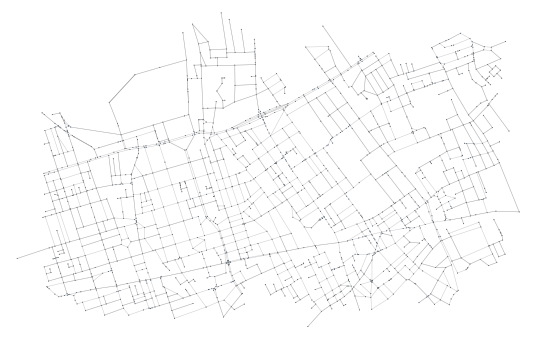

In [54]:
n.plot()

In [55]:
n.generate_validation_report()

2020-06-26 17:56:31,612 - Checking network connectivity for mode: car
2020-06-26 17:56:31,803 - Checking network connectivity for mode: walk
2020-06-26 17:56:31,961 - Checking network connectivity for mode: bike


{'graph_connectivity': {'car': {'problem_nodes': {'dead_ends': [],
    'unreachable_node': []},
   'number_of_connected_subgraphs': 1,
   'connected_subgraphs': [(['6231703658',
      '107989',
      '1684410144',
      '313181127',
      '6298127651',
      '2476787985',
      '25529938',
      '769191592',
      '1455776397',
      '6356000006',
      '109395',
      '333650017',
      '102022',
      '1684410076',
      '6311528475',
      '305691971',
      '1953676009',
      '14776836',
      '4307559861',
      '1678452823',
      '823943',
      '1204707018',
      '25472673',
      '4243601481',
      '1230997195',
      '4243601502',
      '4368839120',
      '25531870',
      '107890',
      '21651908',
      '2198870618',
      '2489433555',
      '1614926320',
      '1611159818',
      '6217603456',
      '25256828',
      '2833955770',
      '108025',
      '110033',
      '3085005043',
      '2449033988',
      '25472992',
      '9521029',
      '25472162',
      '979149

## Adding two networks

You can add one network to another. The network you're adding the other network too will be updated with the nodes, link and data from the other network.

For now, the method only supports non overlapping services so let's merge two graphs, one of which being a small subgraph of `n`.

In [56]:
n_nodes = ['25508485', '21667818', '25508485']

In [57]:
other_n = gn.Network()
other_n.epsg = 'epsg:27700'
other_n.graph = n.graph.subgraph(n_nodes)
other_n.schedule = gn.Schedule()
other_n.schedule.epsg = 'epsg:27700'

In [58]:
other_n

<Network instance at 4623089424: with 
graph: Name: Graph_for_plotting
Type: MultiDiGraph
Number of nodes: 2
Number of edges: 4
Average in degree:   2.0000
Average out degree:   2.0000 and 
schedule Number of services: 0
Number of unique routes: 0

In [59]:
n.add(other_n)

2020-06-26 17:56:32,243 - Changed Node attributes under index: 25508485
2020-06-26 17:56:32,248 - Changed Node attributes under index: 21667818
/Users/kasia.kozlowska/PycharmProjects/ABM/genet/genet/utils/graph_operations.py:294: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for idx in s2_id_df.dropna()[s2_id_df['right'] != s2_id_df['left']].index]
2020-06-26 17:56:32,254 - Finished consolidating node indexing between the two graphs
2020-06-26 17:56:57,063 - Finished consolidating link indexing between the two graphs


In [60]:
n

<Network instance at 4595795408: with 
graph: Name: Graph_for_plotting
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 and 
schedule Number of services: 62
Number of unique routes: 520

The number of nodes and edges should be the same in the output as we merged a subgraph of n.

```
<Network instance at 4548707792: with 
graph: Name: 
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 and 
schedule Number of services: 62
Number of unique routes: 520
```

## Writing results

In [61]:
n.write_to_matsim(os.path.join(path_to_matsim_network, 'genet_output'))

2020-06-26 17:56:57,180 - Writing /Users/kasia.kozlowska/PycharmProjects/ABM/genet/example_data/pt2matsim_network/genet_output/network.xml
2020-06-26 17:56:57,654 - Writing /Users/kasia.kozlowska/PycharmProjects/ABM/genet/example_data/pt2matsim_network/genet_output/schedule.xml
2020-06-26 17:56:57,668 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-06-26 17:56:57,669 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,672 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,673 - Route needs to have 

2020-06-26 17:56:57,752 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,755 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,756 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,759 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:57,835 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,836 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,837 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,838 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:57,910 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,911 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,912 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,914 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:57,951 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,951 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,952 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:57,954 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:57,996 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-06-26 17:56:57,997 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,000 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-06-26 17:56:58,001 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,004 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Sc

2020-06-26 17:56:58,059 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,061 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,063 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,064 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,114 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,115 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,117 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,118 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,181 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,182 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,183 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,184 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,227 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,229 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,231 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,232 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,300 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,303 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,309 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,315 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,370 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,372 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,374 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,375 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,414 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,415 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,416 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,417 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,459 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,461 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,462 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,464 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-06-26 17:56:58,510 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,511 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,512 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-06-26 17:56:58,513 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route